In [2]:
!pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 47 kB 423 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [36]:
query= """
     SELECT SALE_DATE, CUSTOMER_NAME, POS_NUM, RECEIPT_NUM, ITEM_NAME,SALE_TIME, SALE_CNT
     FROM sales_sample
     WHERE SALE_DATE BETWEEN 20200201 AND 20200229
     ;
     """
def query_MariaDB(query):
    import pandas as pd
    import pymysql
    conn = pymysql.connect(host='10.231.238.236', port=31000,user='lglopt', password='123bigdata',database='lgl_opt_sample')
    query_result = pd.read_sql(query, conn)
    return query_result

al=query_MariaDB(query) 

In [195]:
import pandas as pd
from konlpy.tag import Komoran
from nltk.corpus import stopwords
komoran = Komoran()
stuff=name[name['category']=='수산/정육']
stuff['ngram']='.'
stuff=stuff.reset_index().drop('index',axis=1)
for i in range(673): 
    stuff['ngram'][i]=komoran.nouns(stuff['ITEM_NAME'][i])
import itertools
list_of_lists=[i for i in stuff['ngram'].values]
woo=list(itertools.chain(*list_of_lists))
woo_bag=pd.DataFrame(pd.Series(woo),columns={'ngram'})
woo_bag['count']='.'
for i in range(len(woo_bag)):
    woo_bag.iloc[[i],[1]]=woo.count(woo[i])
go=woo_bag.sort_values('count',ascending=False)    
go=go.drop_duplicates()
go=go.reset_index()
go=go.drop('index',axis=1)
go

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ngram,count
0,한우,472
1,등급,348
2,진심,116
3,다리,93
4,장수,86
...,...,...
300,1.5,1
301,낙지,1
302,배,1
303,하남,1


In [245]:
n=12
print(go['ngram'][n])
x=go['ngram'][n]
left.loc[left['ITEM_NAME'].str.contains(x)].ITEM_NAME.values
# left.loc[left['ITEM_NAME'].str.contains(x),'category']='수산/정육'

양지


array(['호주산와규양지(프랭크스테이크)', '미국산냉동우삼겹양지(업진살)', '호주산와규양지(치마살)',
       "L'grow호주와규차돌양지", '호주산곡물우양지(치마살)', '호주산냉장우양지(특정)', '미국산냉장우양지(특정)',
       '호주산와규양지(업진안살)', '양지)박하향캔디340G', 'E-호주산곡물우양지(치마살)', '양지)박하향캔디300G',
       '양지)흑사탕330G', '양지)고려홍삼캔디300G', '미국산냉동우양지(특정)', '양지)종합캔디450G',
       '양지)홍삼캔디800G', '양지)종합캔디300G'], dtype=object)

In [299]:
left.loc[(left['ITEM_NAME'].str.contains('|'.join(go[340:]['ngram'].values)))&(left['ITEM_NAME'].str.contains('G|KG|ML|L|g|오뚜기|백설|란|전남|김치|크랩|매운|강정|푸드|청우|회|행사|EA|식품|농|석|쇠')==False)].ITEM_NAME.values

array(['유한킴벌리)크리넥스KF94(방역)마스크_대형1P', '유한킴벌리)크리넥스스타일마스크블랙_대형3P',
       '유한킴벌리)크리넥스KF80(황사)마스크_중형3P', '유한킴벌리)크리넥스건강마스크카카오_대형5P',
       '유한킴벌리)크리넥스디럭스미니230매*6', '유한킴벌리크리넥스여행용70매*3',
       '유한킴벌리)크리넥스스타일마스크블랙_중형3P', '유한킴벌리)크리넥스KF80(황사)마스크_대형3P',
       '유한킴벌리)크리넥스KF80(황사)마스크_소형3P', '유한킴벌리입체마스크성인용3P',
       '유한킴벌리)크리넥스KF94(방역)마스크_소형3P', '유한킴벌리)데일리방역마스크KF94(블랙)',
       '유한킴벌리)크리넥스KF94(방역)마스크_대형3P', '유한킴벌리입체마스크아동용3P',
       '유한킴벌리)좋은느낌슬림날개오버10P', '유한킴벌리)좋은느낌좋은순면울날중36P', '바디피트천연코튼라벤더20P',
       '유한킴벌리)좋은느낌좋은순면슬림중형36P', '유한킴벌리)크리넥스KF94(방역)마스크_중형3P',
       '유한킴벌리)크리넥스뽑아쓰는키친타올140매*4', '유한킴벌리)크리넥스안심물티슈캡60매',
       '유한킴벌리)좋은느낌울날대32P', '유한킴벌리뉴크리네스수앤수10매*6', '유한킴벌리화이트시크릿울날오버14P',
       '유한킴벌리)크리넥스건강마스크(중형)5P', '유한킴벌리)하기스수딩케어물티슈 72매',
       '유한킴벌리)화이트에코프레시팬티라이너일반48P', '좋은순면라이너일반40P', '유한킴벌리)크리넥스수앤수캡80매',
       '유한킴벌리)화이트에코프레시울날오버28P', '유한킴벌리)화이트데일리라이너산뜻일반48P',
       '유한킴벌리)닥터마밍촉촉케어물티슈캡64매*6', '유한킴벌리좋은느낌오가닉코튼커버중14P',
       '유한킴벌리화이트시크릿와&롱슬림날개대32P', '유한킴벌리)화이트데일리라이너산뜻롱40P',
       '3M일반형정전

In [52]:
la=meat[(meat['SALE_DATE']==20200402)&(meat['CUSTOMER_NAME']=='G유진점')].groupby(['ITEM_NAME','DISCOUNT']).count().unstack()['SALE_CNT'].fillna(0).sort_values(1,ascending=False)
la[la[0]<la[1]]

DISCOUNT,0,1
ITEM_NAME,,
1등급한돈삼겹살,9.0,28.0
1등급한돈목심,7.0,22.0


In [23]:
df=alll[alll['DISCOUNT']==1].reset_index().groupby(['ITEM_NAME','SALE_DATE']).sum()['SALE_CNT'].unstack(level=0).fillna(0).transpose()
df['sum']=df.sum(axis=1)
df=df.sort_values('sum',ascending=False)
df=df[df['sum']>100]

In [52]:
fd=alll[alll['DISCOUNT']==0].reset_index().groupby(['ITEM_NAME','SALE_DATE','CUSTOMER_NAME']).sum()['SALE_CNT'].unstack(level=1).fillna(0)
fd['sum']=fd.sum(axis=1)
fd=fd.sort_values('sum',ascending=False)
fd=fd[fd['sum']>100]

In [35]:
pd.merge(fd.reset_index(),df.reset_index(),on='ITEM_NAME',how='right')[['ITEM_NAME', '20200501_x','20200501_y', '20200502_x','20200502_y', '20200503_x','20200503_y', '20200504_x','20200504_y',
       '20200505_x',  '20200505_y','20200506_x','20200506_y', '20200507_x','20200507_y', '20200508_x', '20200508_y','20200509_x', '20200509_y',
       '20200510_x', '20200510_y', '20200511_x',  '20200511_y','20200512_x',  '20200512_y','20200513_x','20200513_y', '20200514_x', '20200514_y',
       '20200515_x','20200515_y', '20200516_x','20200516_y', '20200517_x', '20200517_y', '20200518_x',  '20200518_y','20200519_x','20200519_y',
       '20200520_x', '20200520_y', '20200521_x', '20200521_y','20200522_x', 'sum_x', '20200522_y', 'sum_y']]

SALE_DATE,ITEM_NAME,20200501_x,20200501_y,20200502_x,20200502_y,20200503_x,20200503_y,20200504_x,20200504_y,20200505_x,...,20200519_x,20200519_y,20200520_x,20200520_y,20200521_x,20200521_y,20200522_x,sum_x,20200522_y,sum_y
0,애호박(특),2148.0,244.0,2353.0,247.0,1956.0,215.0,3483.0,787.0,2225.0,...,2923.0,236.0,1612.0,160.0,1542.0,148.0,1544.0,63315.0,159.0,8655.0
1,판계란(대란)/30입,4827.0,904.0,5121.0,897.0,4117.0,700.0,4963.0,965.0,4614.0,...,993.0,112.0,1418.0,488.0,1376.0,401.0,1498.0,56660.0,568.0,11836.0
2,제스프리썬골드키위(개),4816.0,159.0,4467.0,144.0,2961.0,57.0,3364.0,57.0,2874.0,...,950.0,6.0,875.0,14.0,643.0,34.0,791.0,39161.0,24.0,841.0
3,네이블오렌지(왕특/개),5565.0,864.0,6290.0,499.0,4875.0,820.0,6236.0,808.0,4489.0,...,79.0,9.0,50.0,0.0,55.0,24.0,163.0,38811.0,21.0,5190.0
4,초L세이브)우유930ML*2,3015.0,721.0,2888.0,577.0,2411.0,476.0,2856.0,727.0,2599.0,...,534.0,143.0,675.0,136.0,619.0,136.0,523.0,38574.0,149.0,8772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,사조)365더매운육포70G,NaN,2.0,NaN,1.0,NaN,4.0,NaN,5.0,NaN,...,NaN,7.0,NaN,7.0,NaN,6.0,NaN,NaN,10.0,102.0
2121,만가닥버섯(팩),NaN,1.0,NaN,9.0,NaN,7.0,NaN,6.0,NaN,...,NaN,4.0,NaN,6.0,NaN,6.0,NaN,NaN,1.0,102.0
2122,풀무원)어묵가라아게(콘치즈)140G,NaN,8.0,NaN,2.0,NaN,5.0,NaN,16.0,NaN,...,NaN,0.0,NaN,0.0,NaN,1.0,NaN,NaN,1.0,102.0
2123,해태)쥬시젤리(디즈니썸썸)56G,NaN,4.0,NaN,6.0,NaN,0.0,NaN,1.0,NaN,...,NaN,1.0,NaN,12.0,NaN,7.0,NaN,NaN,3.0,101.0


In [2]:
import pandas as pd
# left=findout[findout['category'].isnull()]

In [ ]:
df=alll[~alll['ITEM_NAME'].str.contains('재활용|다이소|봉투|균일가')].reset_index().groupby(['ITEM_NAME','SALE_DATE','CUSTOMER_NAME']).sum()['SALE_CNT'].unstack(level=1).fillna(0)
df['sum']=df.sum(axis=1)
df=df.sort_values('sum',ascending=False)
df=df[df['sum']>100]
df[:60]

In [4]:
def table(dt):
    dt=dt.groupby(['ITEM_NAME','SALE_DATE']).sum()['SALE_CNT'].unstack().fillna(0)
    dt['mean']=dt.mean(axis=1)
    dt['mean']=dt['mean'].apply(lambda x: int(int(x)*0.01))
    dt['max']=dt.max(axis=1)
    dt=dt.sort_values('mean',ascending=False)
    return dt
table(alll)

SALE_DATE,20200201.0,20200202.0,20200203.0,20200204.0,20200205.0,20200206.0,20200207.0,20200208.0,20200209.0,20200210.0,...,20200222.0,20200223.0,20200224.0,20200225.0,20200226.0,20200227.0,20200228.0,20200229.0,mean,max
ITEM_NAME,,,,,,,,,,,,,,,,,,,,,
롯데)월드콘(바닐라)2000,6060.0,6247.0,3541.0,3464.0,4363.0,4545.0,4091.0,6107.0,1077.0,4278.0,...,39021.0,6174.0,35249.0,29032.0,10675.0,13020.0,12011.0,17637.0,364,305754.0
판계란(대란)/30입,12581.0,13478.0,17588.0,15707.0,32361.0,32336.0,17005.0,18182.0,5678.0,20270.0,...,45685.0,7017.0,29024.0,24424.0,24616.0,24081.0,21415.0,25723.0,201,45685.0
사과(특/개),5014.0,4328.0,4479.0,4340.0,29942.0,33226.0,20762.0,21345.0,3799.0,24202.0,...,34063.0,6165.0,36221.0,26727.0,10472.0,8277.0,6232.0,6735.0,184,36221.0
스위트마운틴바나나EA,18573.0,17826.0,21830.0,19307.0,31070.0,28569.0,23733.0,24522.0,6656.0,26948.0,...,231.0,15.0,851.0,790.0,16502.0,20515.0,22069.0,26371.0,119,31070.0
애호박(특),7496.0,7473.0,8637.0,7486.0,16467.0,16532.0,9638.0,8547.0,2006.0,8768.0,...,12964.0,2320.0,15826.0,12801.0,19197.0,21064.0,20559.0,22924.0,115,22924.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
띠리에)미니바닐라초코렛바8개입360ML,4.0,7.0,5.0,2.0,1.0,0.0,2.0,3.0,0.0,10.0,...,3.0,1.0,2.0,7.0,0.0,4.0,6.0,20.0,0,20.0
띠리에)미니바닐라카라멜콘8개입360ML,3.0,1.0,0.0,0.0,1.0,8.0,8.0,4.0,0.0,0.0,...,2.0,4.0,4.0,4.0,1.0,2.0,5.0,12.0,0,12.0
띠리에)미니양배추1KG,9.0,10.0,14.0,4.0,13.0,17.0,10.0,11.0,0.0,3.0,...,43.0,3.0,27.0,29.0,33.0,22.0,37.0,28.0,0,45.0


In [93]:
#송파센터/서초센터 : 오전에 신선 구매 낮은 점포-->지역적 구분 위해
query= """
     SELECT SALE_DATE, CUSTOMER_NAME, POS_NUM, RECEIPT_NUM, ITEM_NAME,SALE_TIME
     FROM sales_sample
     WHERE SALE_DATE>20200430 AND CUSTOMER_NAME in ('가락점','석촌점','방이점','석촌점','성내점','송파점','신천점','잠실3동점','프리미엄문정점','프리미엄잠실점','풍남점','위례중앙점','오금점')
     ;
     """
def query_MariaDB(query):
    import pandas as pd
    import pymysql
    conn = pymysql.connect(host='10.231.238.236', port=31000,user='lglopt', password='123bigdata',database='lgl_opt_sample')
    query_result = pd.read_sql(query, conn)
    return query_result

songpa=query_MariaDB(query) 

In [201]:
# 2.신선식품 3시간마다 함수 
for i in range(len(customer_list)):
    eu=pd.merge(table10[table10['CUSTOMER_NAME']==customer_list[i]],category,on='ITEM_NAME',how='left')
    eu=eu.dropna()
    eu['time']=eu['SALE_TIME'].apply(lambda x: int(x*0.0001))
    def time(df):
        if df['time'] in (8,9,10):
            return '아침'
        elif df['time'] in [11,12,13]:
            return '점심'
        elif df['time'] in [14,15,16]:
            return '오후'
        elif df['time'] in [17,18,19]:
            return '저녁'
        else: 
            return '밤'
    eu['time']=eu.apply(time,axis=1)
    eu=eu.groupby(['time','category']).count().unstack()['ITEM_NAME'].transpose().reset_index()
    eu['점포명']=customer_list[i]
    customer[i]=eu
    print(customer_list[i])

범서점
G유진점
수성점
잠원점
프리미엄도곡점
연수점
광주점
장락점
장안점
G내손점
서초센터
전농점
의정부점
G화곡점
프리미엄용호점
삼천점
엑스포점
G운정점
프리미엄기흥점
프리미엄서초점
프리미엄일원점
프리미엄공덕점
신천점
서대문센터
G속초점
인후점
G홍제점
부산화명점
원주점
복현점
G은마점
G은평점
남가좌점
G마포점
일산점
연산점
프리미엄문정점
원효로점
용인동천점
프리미엄잠실점
분당서현점
대연점
김해장유점
G속초조양
수지점
오토프레시의왕센터
문흥점
용인점
언남점
G고양삼송
송파센터
가락점
안양점
인계점
상계11점
G신곡점
서초국제점
프리미엄삼성점
경주점
여의점
상록수점
상남점
장안센터
성내점
G대림점
우장산점
상계센터
코엑스점


IndexError: list assignment index out of range

In [202]:
b=pd.DataFrame(columns={'점포명','month','category','아침','점심','오후','저녁','밤'}) 
for i in range(68):
    b=pd.concat([b,customer[i]])
b    

,category,점심,month,밤,저녁,아침,점포명,오후
0,과일/채소/쌀,8305,NaN,7185,13892,2277,범서점,11666
1,수산/정육,1558,NaN,1195,2862,413,범서점,2405
2,유제품/냉장/냉동,4828,NaN,5152,9119,1448,범서점,7155
0,과일/채소/쌀,8631,NaN,5212,10839,2182,G유진점,11560
1,수산/정육,1212,NaN,687,1810,261,G유진점,1819
...,...,...,...,...,...,...,...,...
1,수산/정육,393,NaN,113,297,317,상계센터,409
2,유제품/냉장/냉동,2111,NaN,743,1729,1866,상계센터,2101
0,과일/채소/쌀,2807,NaN,2481,4771,856,코엑스점,3778
1,수산/정육,249,NaN,182,471,79,코엑스점,291


In [41]:
import matplotlib as mpl
import matplotlib.font_manager as fm
# print ('설정파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# font_list[:10] 
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

설정파일 위치:  /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc


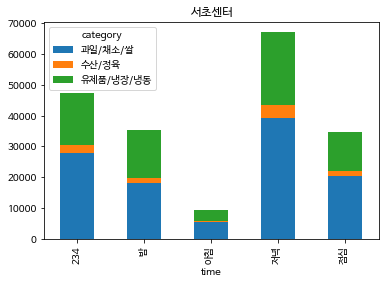

In [96]:
# 신선식품의 구매빈도  (배송 패턴 :오전 신선/오후 상온)  
# 오전 신선 구매 비중 낮은 점포 지역적으로 구분 차량 배차에 도움
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
# plt.subplot(2, 1, 1)
# sus.groupby(['time','category']).count().unstack()['ITEM_NAME'].plot(kind='bar',stacked=True)
# plt.title('수성점')
# plt.show()
# 1행 2열에서 2 번째 subplot
# plt.subplot(2, 1, 2)
eu.groupby(['time','category']).count().unstack()['ITEM_NAME'].plot(kind='bar',stacked=True)
plt.title('송파센터')
plt.show()

In [281]:
# 1. 전 기간 전 점포 시간대별 내점고객수 시각화  
table01['time']=table01['SALE_TIME'].apply(lambda x: int(x*0.0001))

In [282]:
tot=pd.concat([table01,table0,table1,table10])

In [341]:
from datetime import datetime
to['month']=to['SALE_DATE'].apply(lambda x: datetime.strptime(str(x),"%Y%m%d").month)

In [337]:
to=tot[['CUSTOMER_NAME','SALE_DATE','POS_NUM','RECEIPT_NUM','time']].drop_duplicates()
to[(to['CUSTOMER_NAME']=='서대문센터')&(to['time']==0)]

,CUSTOMER_NAME,SALE_DATE,POS_NUM,RECEIPT_NUM,time
6302674,서대문센터,20200216,905,2,0
4485334,서대문센터,20200411,905,2,0


In [342]:
to

,CUSTOMER_NAME,SALE_DATE,POS_NUM,RECEIPT_NUM,time,month
0,상계센터,20200201,905,2,8,2
2,상계센터,20200201,905,3,8,2
3,송파센터,20200201,905,2,8,2
7,상계센터,20200201,905,4,8,2
8,상계센터,20200201,905,5,8,2
...,...,...,...,...,...,...
8299707,경주점,20200522,1,510,23,5
8299710,경주점,20200522,1,511,23,5
8299714,경주점,20200522,1,512,23,5
8299715,경주점,20200522,1,513,23,5


In [356]:
z=to[['CUSTOMER_NAME','SALE_DATE','POS_NUM','RECEIPT_NUM','time','month']].drop_duplicates().groupby(['time','CUSTOMER_NAME','month']).count()['RECEIPT_NUM'].unstack().fillna(0)

In [391]:
pd.pivot_table(z, index=['cust_id', 'grade'], columns='prod_cd', values='pch_amt')

month              sum                                                        \
CUSTOMER_NAME   (폐)송내점    G고양삼송     G내손점     G대림점     G마포점     G복대점     G부곡점   
time                                                                           
8                 0.00     0.00    24.75     0.00     0.00     0.00    27.25   
9                 0.50     2.50   773.00     0.00     0.00     1.00   687.00   
10             1009.25  1170.25  1780.00  1068.75  1191.50  1755.25  1521.75   
11             1608.75  1562.75  2398.75  1305.25  1555.25  1949.75  2048.50   
12             1889.00  1759.75  2615.25  1449.00  1928.00  2148.75  2377.25   
13             1989.75  1829.00  2584.50  1354.00  1824.00  2183.75  2425.00   
14             2220.25  2006.75  2768.50  1606.25  1958.25  2451.25  2798.75   
15             2677.00  2518.50  3370.75  1941.25  2451.75  3154.25  3210.00   
16             2947.25  2892.50  4177.75  2476.00  2799.00  3554.50  3643.00   
17             3169.25  3085.25  4702.00  2722.50  3129.75  3800.75  3812.25   
18             3449.25  3150.00  5063.50  3062.50  3595.25  3671.75  4146.50   
19             2939.00  2791.25  4234.25  2802.50  3356.00  2937.25  3422.25   
20             2220.00  2147.25  3350.25  1987.00  2726.75  2751.00  2511.25   
21             1785.50  1723.25  2625.50  1653.25  2255.75  2289.00  1837.50   
22              941.25  1046.75  1744.50   971.50  1744.75  1118.00   868.75   
23                4.25    13.00    21.00    12.75     4.00     1.50     0.50   

month                                     ...                             \
CUSTOMER_NAME     G속초점    G속초조양     G신곡점  ...  프리미엄삼성점  프리미엄서초점  프리미엄용호점   
time                                      ...                              
8                 0.00     0.00     0.00  ...     0.00     2.25     0.00   
9                 3.00     0.00     1.50  ...     7.75   139.50     0.00   
10             1799.25  1153.50  1305.50  ...  1067.75  1398.25  1051.50   
11             1910.75  1342.75  1479.00  ...  1284.50  1768.50  1584.00   
12             2052.00  1419.00  1643.00  ...  1613.50  2402.00  1917.00   
13             2011.75  1433.75  1636.25  ...  1518.50  2171.75  2040.50   
14             2412.25  1644.25  1862.00  ...  1509.25  2031.75  2364.75   
15             2740.50  2066.25  2261.75  ...  1836.75  2426.75  2898.25   
16             3133.00  2596.50  2755.25  ...  2054.00  2674.00  3389.50   
17             3211.25  3181.25  3101.75  ...  2335.75  2804.25  3481.00   
18             3159.25  3510.25  3540.00  ...  2564.50  3061.50  3256.75   
19             2135.75  2528.75  3053.75  ...  2318.25  2581.50  2966.00   
20             1638.75  1985.25  2446.50  ...  1883.00  1976.25  2874.50   
21             1064.75  1686.00  1973.25  ...  1458.00  1601.50  2433.00   
22              708.50  1042.00  1296.75  ...   861.25   823.25    35.25   
23                3.50    14.00    11.50  ...     0.75     0.00     0.00   

month                                                                         
CUSTOMER_NAME  프리미엄일원점  프리미엄잠실점  프리미엄황금점      하당점     한마음점     해운대점      행당점  
time                                                                          
8                 0.00     4.25    35.50     0.00    43.50    25.50    10.00  
9                 1.25     1.75   456.75     1.00   761.50   901.50   475.50  
10             1379.00  1534.00  1221.25  1849.50  1195.25  1619.25  1383.00  
11             1840.25  2341.00  1669.00  1775.25  1496.50  1948.25  1784.25  
12             2075.00  3338.25  1864.25  1714.25  1732.00  2381.25  2115.50  
13             1794.50  2900.25  1762.25  1710.00  1608.00  2334.00  2127.25  
14             1991.25  2650.25  1936.50  1940.50  1878.25  2643.50  2160.50  
15             2612.50  3196.00  2451.75  2366.00  2277.00  3183.50  2522.00  
16             3175.75  3720.25  2841.50  2690.50  2348.25  3486.75  2768.00  
17             4094.75  4435.25  3187.50  2739.50  3237.25  3754.25  3028.25  
18     

<Figure size 1728x2016 with 0 Axes>

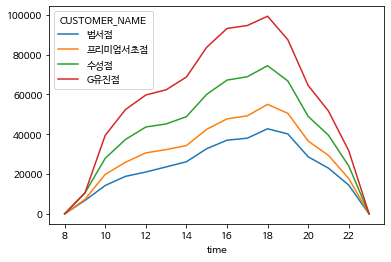

In [334]:
plt.figure(figsize=(24, 28))
tot[['CUSTOMER_NAME','SALE_DATE','POS_NUM','RECEIPT_NUM','time']].drop_duplicates().groupby(['time','CUSTOMER_NAME']).count().unstack()['RECEIPT_NUM'].fillna(0)[5:][['범서점','프리미엄서초점','수성점','G유진점']].plot(stacked=True)

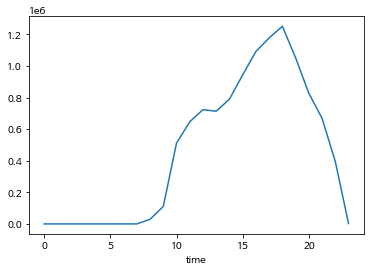

In [338]:
import matplotlib.pyplot as plt
tot[['CUSTOMER_NAME','SALE_DATE','POS_NUM','RECEIPT_NUM','time']].drop_duplicates().groupby(['time']).count()['RECEIPT_NUM'].plot()
plt.show() #2,3,4,5월

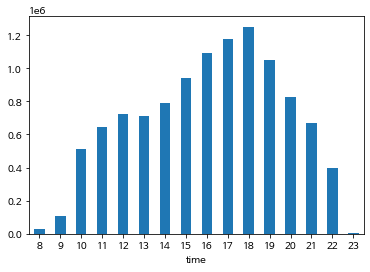

In [287]:
import matplotlib.pyplot as plt
tot[['CUSTOMER_NAME','SALE_DATE','POS_NUM','RECEIPT_NUM','time']].drop_duplicates().groupby(['time']).count()['RECEIPT_NUM'][5:].plot.bar(stacked=True)
plt.show() #2,3,4,5월

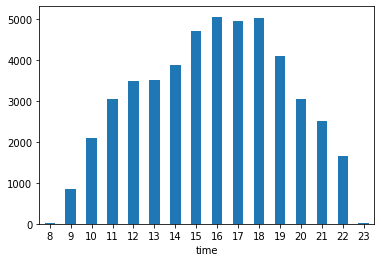

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
doo.groupby(['time']).count()['RECEIPT_NUM'].plot.bar(stacked=True)
plt.show()

In [8]:
import pandas as pd
nocategory=pd.Series(list(set(join['ITEM_NAME']) - set(sample['ITEM_NAME'])))

In [6]:
sample=join.dropna()
sample.reset_index(inplace=True)
sample.drop('index',axis=1,inplace=True)
fresh=sample[sample['category'].str.contains('과일/채소/쌀|유제품/냉장/냉동')]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [183]:
fresh['SALE_DATE']=pd.to_datetime(fresh['SALE_DATE'],format='%Y%m%d')
import calendar
fresh['yoil']=fresh['SALE_DATE'].apply(lambda x: calendar.weekday(x.year,x.month,x.day))
fresh['time']=fresh['SALE_TIME'].apply(lambda x: int(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [184]:
peryoil=fresh[fresh['category']=='과일/채소/쌀'].groupby(['yoil','time']).sum().sort_values('SALE_CNT',ascending=False)

KeyError: 'time'

In [101]:
pertime=fresh[fresh['category']=='과일/채소/쌀'].groupby('time').sum().sort_values('SALE_CNT',ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


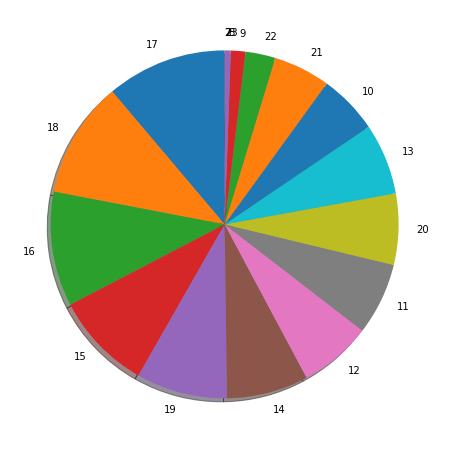

In [102]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.pie(pertime[['SALE_CNT']], labels=pertime.index, shadow=True, startangle=90)
plt.show()

In [12]:
def table(dt):
    dt=dt.groupby(['ITEM_NAME','SALE_DATE']).sum()['SALE_CNT'].unstack().fillna(0)
    dt['mean']=dt.mean(axis=1)
    dt['mean']=dt['mean'].apply(lambda x: int(int(x)*0.01))
    dt['max']=dt.max(axis=1)
    dt=dt.sort_values('mean',ascending=False)
    return dt
# ff=table(fresh)

In [10]:
import pandas as pd
from konlpy.tag import Komoran
from nltk.corpus import stopwords
komoran = Komoran()
for i in range(10,2192449):    
    sample['ngram'][i]=komoran.nouns(sample['ITEM_NAME'][i])

In [75]:
komoran = Komoran()
for i in range(17928): 
    nocategory['ngram'][i]=komoran.nouns(nocategory[0][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [103]:
nocategory['ngram']=nocategory['ngram'].apply(lambda x: ','.join(x))

In [66]:
import itertools 
list_of_lists=[i for i in sample[sample['category']=='가공/주류']['ngram'].values]
instant=list(itertools.chain(*list_of_lists))

In [11]:
import pandas as pd
def basket(table):
    data=table.groupby(['CUSTOMER_NAME', 'SALE_DATE', 'POS_NUM','RECEIPT_NUM']).apply(lambda x: ','.join(x['ITEM_NAME']))
    data = pd.DataFrame(data).reset_index().rename(columns = {0: 'ITEM_NAME'})
    basket = []
    for i in range(len(data)):
        basket.append(data.loc[i, 'ITEM_NAME'].split(','))  
        return basket
basket=basket(table)

In [9]:
import pandas as pd
data=pd.DataFrame(table.groupby(['CUSTOMER_NAME', 'SALE_DATE', 'POS_NUM','RECEIPT_NUM']).apply(lambda x: ','.join(x['ITEM_NAME']))).reset_index().rename(columns = {0: 'ITEM_NAME'})

In [10]:
basket = []
for i in range(len(data)):
    basket.append(data.loc[i, 'ITEM_NAME'].split(','))  
len(basket)

1363501

In [7]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [11]:
basket[:10]

[['CJ두부기획(단단한부침300G+300G)',
  'CJ비비고왕교자만두455G*2',
  '감자(박스)',
  '다다기오이4입/(봉)',
  '달래(팩)',
  '매일)바이오백도85G*4',
  '백설자연재료부침가루1KG',
  '백설자연재료튀김가루1KG',
  '사과B+(4-9입/봉)',
  '서준)순회행사(과세)',
  '서준)순회행사(면세)',
  '쑥갓(봉)',
  '제주돼지앞다리(특정)',
  '차조450G',
  '초L)우리쌀떡국떡700G',
  '팽이버섯300G/봉',
  '포장생굴(150g)',
  '해찬들)태양초고추장골드1KG'],
 ['(신)진로참이슬360ML', 'CJ)비비고새우볶음밥420G', '웅진하늘보리1.5L', '제주감귤'],
 ['CJ)숯불김밥햄110G',
  'LG)샤프란핑크용기3L',
  '농심올리브짜파게티140G*5입',
  '서준)순회행사(면세)',
  '해찬들사계절쌈장500G'],
 ['감자(봉)',
  '농심미니춥파춥스50입',
  '실속당근800G/봉',
  '애호박(특)',
  '오이맛고추/봉',
  '직)딸기_박스',
  '참느타리버섯200G/팩',
  '풀무원두부기획(국산부침300G+국산찌개300G)',
  '해찬들사계절쌈장170G'],
 ['CJ)브랏비엔나(구)360G*2',
  'CJ)비비고사골곰탕500G',
  'CJ)행복한콩콩나물380G',
  'CJ햄스빌베이컨320G',
  '빙그레바이오플레(사과)140ML*8',
  '서울후레쉬밀크2입기획900ML*2',
  '코카콜라500ML',
  '테라(캔)355ML'],
 ['레종프렌치요고50G'],
 ['시차_부추/단', '시차_풋고추(100G)', '시차_흙대파/단', '직)천혜향_개'],
 ['건국)우리우유기획900ML*2', '농심알새우칩68G', '삼립)우유카스테라'],
 ['3M때가쏙빠지는행주(그린)',
  '다다기오이4입/(봉)',
  '새송이버섯(봉)',
  '시차_브로콜리/송이',
  '실속두부520G',
  '양파(중)망',
  '초L)천연

In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.002,use_colnames=True)
# frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
# frequent_itemsets=frequent_itemsets[frequent_itemsets['length']>2].sort_values('support',ascending=False)

In [ ]:
from mlxtend.frequent_patterns import association_rules
trans=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
result=trans[trans['lift']>1].sort_values('confidence',ascending=False)

In [166]:
def table(dt):
    dt=dt.groupby(['ITEM_NAME','SALE_DATE']).sum()['SALE_CNT'].unstack().fillna(0)
    dt['sum']=dt.sum(axis=1)
    dt=dt.sort_values('sum',ascending=False)
    return dt

In [ ]:
table=table(table)

In [ ]:
popular=table.groupby('ITEM_NAME').sum().sort_values('SALE_CNT',ascending=False)[:6570].index.tolist()

In [ ]:
table[table['ITEM_NAME'].isin(popular)][['CUSTOMER_NAME','ITEM_NAME']].drop_duplicates().groupby('CUSTOMER_NAME').count().sort_values('ITEM_NAME',ascending=False)[:60]

In [ ]:
sample=table[table['ITEM_NAME'].isin(popular2.index.tolist())]

In [ ]:
geumchun=geumchun[~geumchun['ITEM_NAME'].str.contains('종량제|쓰레기봉투|쇼핑백|다이소|균일가')]
alias=alias[~alias.ITEM_NAME.isin(vr.index)]
geumchun[geumchun['key'].str.contains(('|').join(key))]

In [ ]:
hmm=[]
for i in range(8788):
    if sak3[sak3['sum']>=13].transpose()[sak3[sak3['sum']>=13].transpose()[last[i]]==0][last[i]].count()>=37:
        hmm.append(sak3[sak3['sum']>=13].transpose()[sak3[sak3['sum']>=13].transpose()[last[i]]==0][last[i]].count())
    else:
        pass

In [ ]:
def change(geumchun):
    import re
    if re.search('마스크',geumchun.ITEM_NAME) is not None:
        return '마스크'
    else:
        return geumchun.ITEM_NAME
geumchun.ITEM_NAME=geumchun.apply(change,axis=1)
# for i in range(3005):
#     print([re.search('마스크',j) for j in frequent_itemsets['itemsets'][i]])

In [ ]:
import numpy as np
from apyori import apriori
rules = apriori(basket, min_support = 0.01, min_confidence = 0.1, min_lift = 1, min_length = 2)
results = list(rules)
results

In [12]:
!pip install pyfpgrowth

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
import pyfpgrowth
transactions=basket
patterns = pyfpgrowth.find_frequent_patterns(transactions, 2)
rules = pyfpgrowth.generate_association_rules(patterns, 0.1) #support
rules #lift confidence는 없는듯